In [38]:
import pandas as pd
import seaborn as sns

In [39]:
dataset = pd.read_csv('./data/matches_bets.csv')
#Include a column called winner where if home_team_ goal is bigger than away_team_goal result is 'H'
#if home_team_ goal is equal to away_team_goal result is 'D', else is 'A'
dataset['winner'] = dataset.apply(lambda row: 'H' if row['home_team_goal'] > row['away_team_goal'] else ('D' if row['home_team_goal'] == row['away_team_goal'] else 'A'), axis=1)
dataset.head()

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,home_win_odds_1,draw_odds_1,away_win_odds_1,winner
0,4769,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,AJ Auxerre,FC Nantes,2,1,2.10,3.1,3.75,H
1,4770,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Girondins de Bordeaux,SM Caen,2,1,1.57,3.6,6.50,H
2,4771,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Le Havre AC,OGC Nice,1,0,2.30,3.0,3.40,H
3,4772,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Le Mans FC,FC Lorient,0,1,2.10,3.1,3.80,A
4,4774,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,AS Monaco,Paris Saint-Germain,1,0,2.40,3.1,3.10,H


In [40]:
#remove the column id, home_team_goal and away_team_goal from the dataframe
dataset = dataset.drop(['id', 'home_team_goal', 'away_team_goal'], axis=1)
# separate the rows from the season 2015/2016 into a different dataframe and remove them from the original dataset
validation = dataset[dataset['season'] == '2015/2016']
dataset = dataset[dataset['season'] != '2015/2016']
#split the dataset into X and y where y are 'home_win_odds_1', 'draw_odds_1' and 'away_win_odds_1'
X = dataset.drop('winner', axis=1)
y = dataset['winner']

In [41]:
X.dtypes

country_name        object
league_name         object
season              object
date                object
home_team           object
away_team           object
home_win_odds_1    float64
draw_odds_1        float64
away_win_odds_1    float64
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is a pandas DataFrame
# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in ['country_name', 'league_name', 'season', 'date', 'home_team', 'away_team']:
    X_encoded[column] = label_encoder.fit_transform(X[column])

In [43]:
X_encoded.head(20)

,country_name,league_name,season,date,home_team,away_team,home_win_odds_1,draw_odds_1,away_win_odds_1
0,2,2,0,0,7,74,2.10,3.10,3.75
1,2,2,0,0,94,197,1.57,3.60,6.50
2,2,2,0,0,124,148,2.30,3.00,3.40
3,2,2,0,0,125,72,2.10,3.10,3.80
4,2,2,0,0,8,155,2.40,3.10,3.10
5,2,2,0,0,9,122,2.15,3.10,3.60
6,2,2,0,0,214,150,2.70,3.00,2.80
7,2,2,0,0,79,97,1.91,3.20,4.33
8,2,2,0,0,232,10,2.40,3.10,3.10
9,7,7,0,0,85,172,6.50,4.00,1.50


In [44]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size = 0.1)

# Random Forest

In [73]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

In [74]:
Y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

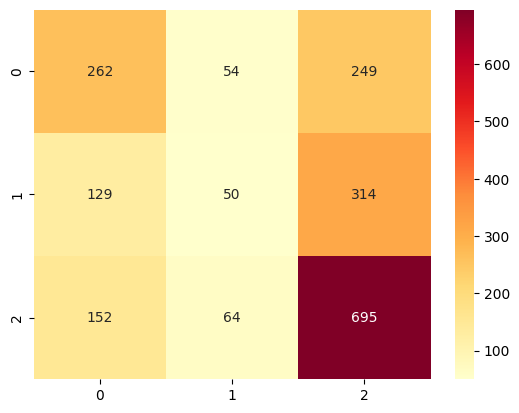

In [76]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')

In [78]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       565
           1       0.30      0.10      0.15       493
           2       0.55      0.76      0.64       911

    accuracy                           0.51      1969
   macro avg       0.44      0.44      0.42      1969
weighted avg       0.47      0.51      0.47      1969



# XGBoost

In [89]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
classifier.fit(X_train, y_train, )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [90]:
Y_pred = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

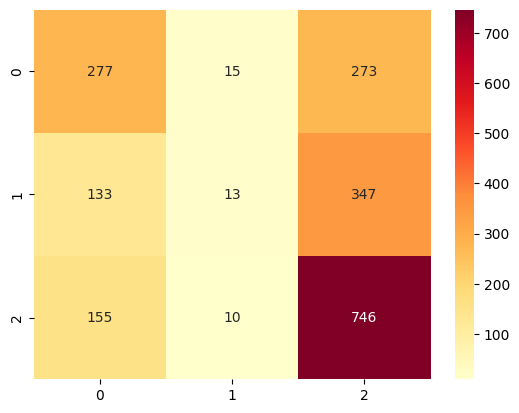

In [92]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')

In [93]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       565
           1       0.34      0.03      0.05       493
           2       0.55      0.82      0.66       911

    accuracy                           0.53      1969
   macro avg       0.46      0.45      0.40      1969
weighted avg       0.48      0.53      0.46      1969

